<a href="https://colab.research.google.com/github/Tahaa1995/CE888/blob/master/Lab_07/Lab_7_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "tahaairshad" # username from the json file
os.environ['KAGGLE_KEY'] = "b1b07e579423c1e6ecbb63a5d21d5fc9" # key from the json file
!kaggle datasets download -d gpiosenka/100-bird-species # api copied from kaggle

 99% 2.24G/2.26G [00:28<00:00, 102MB/s] 
100% 2.26G/2.26G [00:28<00:00, 86.1MB/s]


In [2]:
from zipfile import ZipFile

file_name = "/content/100-bird-species.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
data_dir_list = os.listdir('/content/180/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/180/train"))
file_count = len(files)
print(file_count)

0


In [0]:
original_dataset_dir = '/content/180/train'
base_dir = '/content/180'

In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'valid')

test_dir = os.path.join(base_dir, 'test')

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 24497 images belonging to 180 classes.
Found 900 images belonging to 180 classes.


In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 19s 185ms/step - loss: -1368.9610 - acc: 0.0070 - val_loss: -1397.5892 - val_acc: 0.0050
Epoch 2/30
100/100 [==============================] - 4s 39ms/step - loss: -1434.7031 - acc: 0.0080 - val_loss: -1375.9076 - val_acc: 0.0050
Epoch 3/30
100/100 [==============================] - 4s 39ms/step - loss: -1428.7808 - acc: 0.0070 - val_loss: -1459.1268 - val_acc: 0.0050
Epoch 4/30
100/100 [==============================] - 4s 39ms/step - loss: -1443.8699 - acc: 0.0025 - val_loss: -1397.1906 - val_acc: 0.0100
Epoch 5/30
100/100 [==============================] - 4s 41ms/step - loss: -1410.7895 - acc: 0.0060 - val_loss: -1439.1191 - val_acc: 0.0050
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: -1398.6733 - acc: 0.0085 - val_loss: -1375.6684 - val_acc: 0.0050
Epoch 7/30
100/100 [==============================] - 4s 40ms/step - loss: -1388.2788 - acc: 0.0080 - val_loss: -1371.2843 - val_acc: 0.0150
Epo

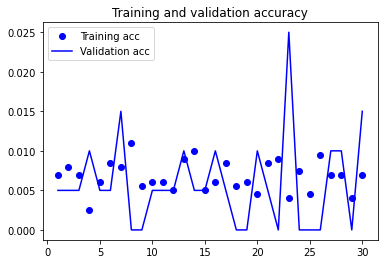

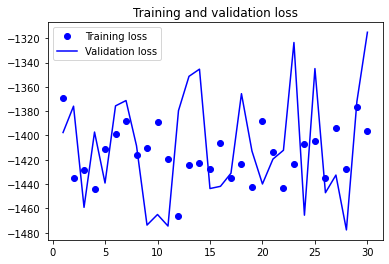

In [14]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 24497 images belonging to 180 classes.
Found 900 images belonging to 180 classes.
Epoch 1/20
100/100 [==============================] - 24s 244ms/step - loss: -1369.0953 - acc: 0.0053 - val_loss: -1412.9496 - val_acc: 0.0064
Epoch 2/20
100/100 [==============================] - 22s 222ms/step - loss: -1427.1125 - acc: 0.0094 - val_loss: -1419.2233 - val_acc: 0.0045
Epoch 3/20
100/100 [==============================] - 22s 219ms/step - loss: -1404.2352 - acc: 0.0081 - val_loss: -1396.3629 - val_acc: 0.0052
Epoch 4/20
100/100 [==============================] - 22s 222ms/step - loss: -1420.1377 - acc: 0.0078 - val_loss: -1417.7364 - val_acc: 0.0057
Epoch 5/20
100/100 [==============================] - 23s 226ms/step - loss: -1376.9687 - acc: 0.0050 - val_loss: -1413.7199 - val_acc: 0.0058
Epoch 6/20
100/100 [==============================] - 22s 216ms/step - loss: -1424.5318 - acc: 0.0062 - val_loss: -1402.6408 - val_acc: 0.0058
Epoch 7/20
100/100 [==============================] - 